<a href="https://colab.research.google.com/github/ANSHIKA1806/MachineLearning_Algorithms/blob/main/Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MULTIVARIATE REGRESSION

###Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
print("All necessary packages are installed successfully")

All necessary packages are installed successfully


###Importing the datasets

In [5]:
url ="https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/House%20rent.csv"
df= pd.read_csv(url, error_bad_lines=False)

###Exploring data

In [6]:
df.head()

,Area,Bedrooms,Age,Rent
0,1024,3.0,15,11200
1,1200,4.0,10,33650
2,800,2.0,5,8000
3,674,2.0,10,6120
4,766,2.0,11,6000


In [7]:
df.tail()

,Area,Bedrooms,Age,Rent
35,760,3.0,4,5120
36,658,2.0,1,3990
37,993,4.0,2,10900
38,890,2.0,9,4980
39,1025,3.0,5,19000


In [8]:
df.shape

(40, 4)

In [9]:
print("Are there any null values? ",df.isnull().values.any())

Are ther any null values?  True


In [10]:
df.isnull().sum()

Area        0
Bedrooms    4
Age         0
Rent        0
dtype: int64

####Replacing null values with median

In [11]:
median = df.Bedrooms.median()
median

3.0

In [12]:
df.Bedrooms = df.Bedrooms.fillna(int(median))
print("Dataframe after filling null values ")
df

Dataframe after filling null values 


,Area,Bedrooms,Age,Rent
0,1024,3.0,15,11200
1,1200,4.0,10,33650
2,800,2.0,5,8000
3,674,2.0,10,6120
4,766,2.0,11,6000
5,680,3.0,36,3200
6,750,3.0,10,3500
7,900,3.0,20,3345
8,967,3.0,23,3100
9,720,3.0,7,6200


###Building the machine learning model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg =LinearRegression() 

In [14]:
reg.fit(df[['Area','Bedrooms','Age' ]],df.Rent)

LinearRegression()

In [15]:
reg.coef_

array([  34.66745591, 2440.61024394, -354.75983519])

In [16]:
reg.intercept_

-24001.729279468836

####Predicted result

In [17]:
reg.predict([[920,3,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([11666.56253816])

####Actual result

In [19]:
y= 34.66745591*920+2440.61024394*3+-354.75983519*10+-24001.729279468836
y


11666.562537651163

In [21]:
r = 100 -(y-reg.predict([[920,3,10]]))
print("Accuracy of the model is ",int(r),"%")


Accuracy of the model is  100 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
x = df.iloc[:,0].values.reshape(-1,1)
x1 = df.iloc[:,1].values.reshape(-1,1)
x2 = df.iloc[:,2].values.reshape(-1,1)
y = df.iloc[:,-1].values

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 1/4, random_state=0)
x1_train, x1_test,y_train, y_test = train_test_split(x1,y,test_size= 1/4, random_state=0)
x2_train, x2_test,y_train, y_test = train_test_split(x2,y,test_size= 1/4, random_state=0)


In [28]:
reg.fit(x_train,y_train)
reg.fit(x1_train,y_train)
reg.fit(x2_train,y_train)

LinearRegression()

In [29]:
y_pred = reg.predict(x_test)
y_pred = reg.predict(x1_test)
y_pred = reg.predict(x2_test)

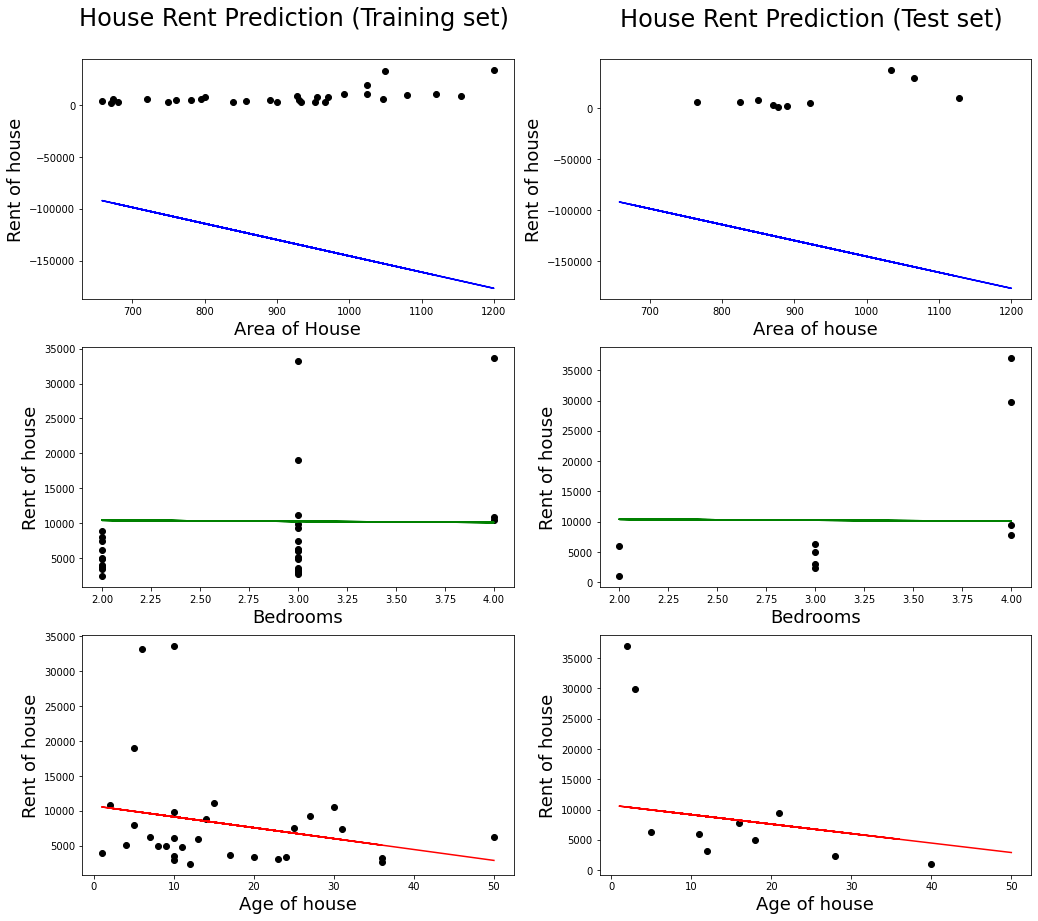

In [34]:
plt.figure(figsize=(17,15))
plt.subplot(3,2,1)
plt.scatter(x_train,y_train, c='k')
plt.plot(x_train,reg.predict(x_train),color ='blue')
plt.xlabel('Area of House',size=18)
plt.ylabel('Rent of house',size=18)
plt.title('House Rent Prediction (Training set) \n',size=24)

plt.subplot(3,2,2)
plt.scatter(x_test,y_test,c='k')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.xlabel('Area of house',size=18)
plt.ylabel('Rent of house',size=18)
plt.title('House Rent Prediction (Test set) \n',size=24)

plt.subplot(3,2,3)
plt.scatter(x1_train,y_train,c='k')
plt.plot(x1_train,reg.predict(x1_train),color='green')
plt.xlabel('Bedrooms',size=18)
plt.ylabel('Rent of house',size=18)

plt.subplot(3,2,4)
plt.scatter(x1_test,y_test,c='k')
plt.plot(x1_train,reg.predict(x1_train),color='green')
plt.xlabel('Bedrooms',size=18)
plt.ylabel('Rent of house',size=18)

plt.subplot(3,2,5)
plt.scatter(x2_train,y_train,c='k')
plt.plot(x2_train,reg.predict(x2_train),color='red')
plt.xlabel('Age of house',size=18)
plt.ylabel('Rent of house',size=18)

plt.subplot(3,2,6)
plt.scatter(x2_test,y_test,c='k')
plt.plot(x2_train,reg.predict(x2_train),color='red')
plt.xlabel('Age of house',size=18)
plt.ylabel('Rent of house',size=18)

plt.show()


###In this exercise, we have got a large negative intercept. As the coefficient of house area is quite small, hence the slope is tending towards the negative direction, resulting in production of a negative scale of values.


#####From the graphs, we can also say that the house rent mostly depends on the age of the house and has almost linearly decreasing relation with age of house. This suggests as the age of house increases, its cost decreases

###Pros or Advantages of Multivariate Regression

1. Multiple factors can be fed into the model and analysed in one go.

2. Works quite fast with most datasets.

3. More realistic than linear regression.

###Cons or Disadvantages of Multivariate Regression
1. If there is a heirarchical dependence for more than 2 independent parameters, like x depends on y and y depends on z, then it would be difficult to plot such values and demonstrate regressions in a single plot.

2. Not suitable for very big datasets of size 10 million or more.

3. Like linear regression, it cannot predict special mathematical patterns.